In [2]:
# Authors: Isabella Silva Ferreira and Micael Veríssimo de Araújo
# e-mails: (is_bella21@hotmail.com)    (micaelvero@hotmail.com)


In [3]:
# Read data File and sapare the all the sets
import os
import pickle
import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn.externals import joblib


from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 
import random

print "All Right!"

Using Theano backend.
Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


All Right!


In [2]:
# Testing GPU
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time
import os
import theano
import keras
#os.environ['THEANO_FLAGS'] = "device=gpu"    

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[GpuElemwise{exp,no_inplace}(<CudaNdarrayType(float32, vector)>), HostFromGpu(GpuElemwise{exp,no_inplace}.0)]
Looping 1000 times took 1.167065 seconds
Result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [5]:
# Confirm our array shape
data = np.load("/home/micael/MyWorkspace/DATA/lvbb125Array.npy")
data_target = data[:,[12]]

data_inputs = data[:,:11]
print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [6]:
print data_inputs.shape
data_inputs

(191100, 11)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
         -9.44688976e-01,  -1.83297706e+00,   9.21870469e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
         -1.17945850e+00,   1.78017831e+00,   1.07602320e+02],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
         -1.95705032e+00,   5.18436611e-01,   3.70010500e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
         -4.98960137e-01,  -2.27387905e+00,   3.86259570e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
         -1.39922500e-01,  -1.46886933e+00,   1.07292875e+02],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
         -6.49389684e-01,  -3.02542996e+00,   6.82103906e+01]])

In [7]:
print data_target.shape
data_target

(191100, 1)


array([[  61.01959766],
       [  64.46546875],
       [ 106.72465625],
       ..., 
       [  33.90225391],
       [  96.8779375 ],
       [  53.51172656]])

In [8]:
path = "/home/micael/MyWorkspace/DATA/NN_outputs"

In [10]:
# Train NN
#from Functions import LogFunctions as log
from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 
import random
import os
import theano
import keras



# Train information 
n_folds = 2
n_inits = 1
norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}
estimator = {}

# Isto deve estar dentro do primeiro 'for'. dessa maneira meu conjuto de treino e validação são os mesmo em todos os folds.

                           

for ifold in range(0,2):
    # Slip the train and test sets
    test_id= random.sample(range(data_inputs.shape[0]),int(np.floor(0.1*data_target.shape[0])))
    lista_id = np.asarray(range(0, data_inputs.shape[0]))
    all_id = np.ndarray.tolist(lista_id)
    train_id = list(set(lista_id) - set(test_id))
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    norm_all_data = scaler.transform(data_inputs)
    
# Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id],
             bins=np.linspace(data_target[train_id].min(),data_target[train_id].max(),50))

    MOP = target_values[np.argmax(freq)]
    
    norm_target = data_target/MOP

    print 'Train Process for %i Fold'%(ifold+1)
    
    best_init = 0
    best_loss = 999
    
    for i_init in range(0,2):
        print 'Init: %i of %i'%(i_init+1,range(0,2)+1)
        model = Sequential()
        model.add(Dense(30, input_dim=data_inputs.shape[1], init='uniform'))
        model.add(Activation('tanh'))
        model.add(Dense(data_target.shape[1], init='uniform')) 
        model.add(Activation('linear'))
        
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='mean_squared_error', optimizer=sgd
                      ,metrics=['accuracy'])

        # Train model
        earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=25, 
                                            verbose=0, mode='auto')
        
        modelCheckPoint = callbacks.ModelCheckpoint(path+"/"+"ModelvNOPTREL.h5", monitor='val_loss',
                                                    verbose=0, save_best_only=True, mode='auto')
        #start_time = time.time()
        init_trn_desc = model.fit(norm_all_data[train_id], norm_target[train_id], 
                                nb_epoch=500, 
                                batch_size=8,
                                callbacks=[earlyStopping, modelCheckPoint], 
                                verbose=0,
                                validation_data=(norm_all_data[test_id],norm_target[test_id]),
                                shuffle=True)

        
        if np.min(init_trn_desc.history['val_loss']) < best_loss:
            best_init = i_init
            best_loss = np.min(init_trn_desc.history['val_loss'])
            estimator[ifold] = model
            trn_desc[ifold] = init_trn_desc  


print "All Right!"

Train Process for 1 Fold
Train Process for 2 Fold
All Right!


In [11]:
# Get the NN output with all envents

NN_output = model.predict(norm_all_data, batch_size=8, verbose=0)

print NN_output

[[ 1.4014107 ]
 [ 1.36546862]
 [ 2.29355812]
 ..., 
 [ 0.80786705]
 [ 2.31050014]
 [ 1.27823949]]


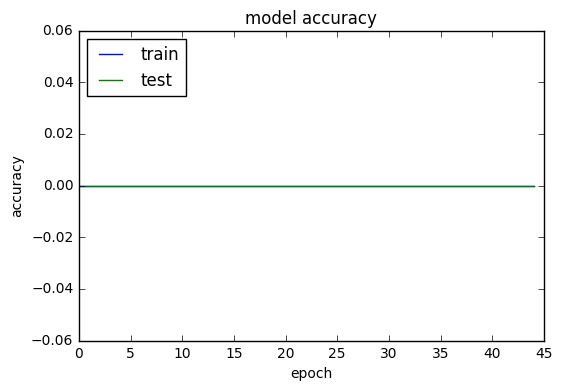

In [12]:
import matplotlib.pyplot as plt
import numpy

plt.plot(init_trn_desc.history['acc'])
plt.plot(init_trn_desc.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

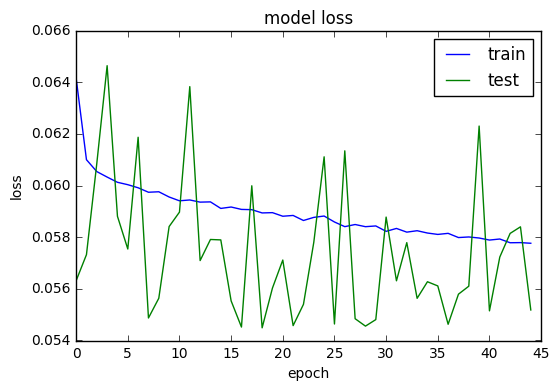

In [13]:
plt.plot(init_trn_desc.history['loss'])
plt.plot(init_trn_desc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

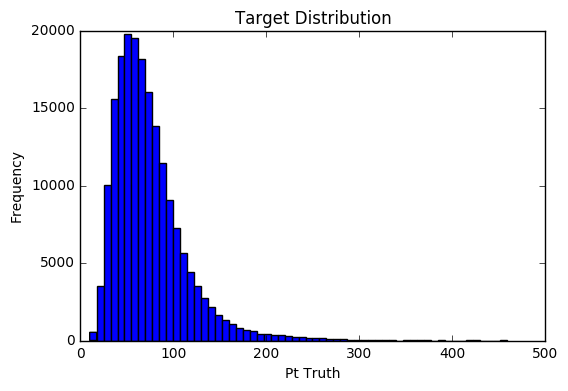

In [14]:
import matplotlib.pyplot as plt
plt.hist(data_target, 60)
plt.title("Target Distribution")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

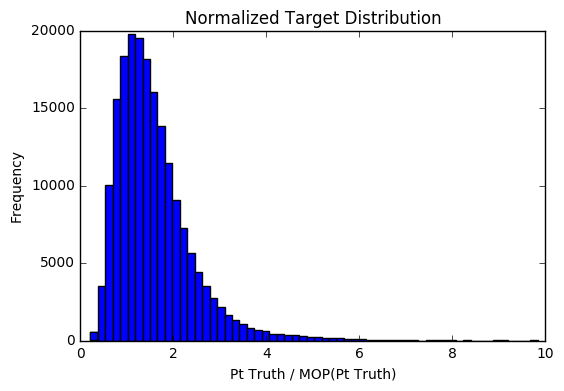

In [15]:
import matplotlib.pyplot as plt
plt.hist(norm_target, 60)
plt.title("Normalized Target Distribution")
plt.xlabel("Pt Truth / MOP(Pt Truth)")
plt.ylabel("Frequency")
plt.show()

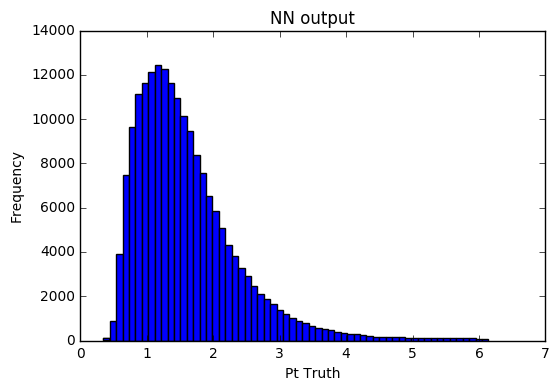

In [16]:
import matplotlib.pyplot as plt

plt.hist(NN_output, 60)
plt.title("NN output")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

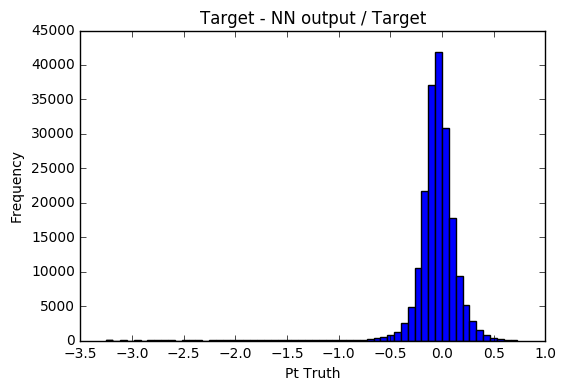

In [17]:
import matplotlib.pyplot as plt

plt.hist((norm_target - NN_output)/norm_target, 60)
plt.title("Target - NN output / Target")
plt.xlabel("Pt Truth")
plt.ylabel("Frequency")
plt.show()

In [ ]:
NN_output_noNorm = NN_output * MOP
np.save(output+"/"+"CorFactors.npy", NN_output_noNorm)
print NN_output_noNorm